## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
# Импортируем библиотек
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.1f}'.format

Считаем данные из csv-файлов в датафреймы

In [2]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv') # данные о прокатных удостоверениях. 
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv') # данные о прокате в российских кинотеатрах.

Изучим данные находящиеся в каждом датафрейме

In [3]:
mkrf_movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [4]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
mkrf_movies.describe()

,refundable_support,nonrefundable_support,budget
count,332.0,332.0,332.0
mean,"11,864,457.8","48,980,988.9","127,229,716.7"
std,"24,916,555.3","59,980,117.9","188,588,333.1"
min,0.0,0.0,0.0
25%,0.0,"25,000,000.0","42,000,000.0"
50%,0.0,"30,000,000.0","68,649,916.0"
75%,"15,000,000.0","40,375,000.0","141,985,319.5"
max,"180,000,000.0","400,000,000.0","2,305,074,303.0"


In [6]:
mkrf_shows.head(10)

,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"
5,111000119,"4,293,649.5"
6,111000212,200.0
7,111000216,"355,567.0"
8,111000313,710.0
9,111000314,"1,607,970.0"


In [7]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В этой таблице отсутствуют пропуски в данных

In [8]:
mkrf_shows.describe()

,puNumber,box_office
count,"3,158.0","3,158.0"
mean,"120,187,475.3","76,478,696.2"
std,"12,383,941.2","240,353,122.8"
min,"111,000,113.0",0.0
25%,"113,000,191.8","86,239.0"
50%,"121,013,114.5","2,327,987.5"
75%,"121,028,317.8","23,979,671.0"
max,"224,026,410.0","3,073,568,690.8"


Изменим тип данных в столбце puNumber

Для начала проверим какие значения существуют в этом столбце

In [9]:
mkrf_movies['puNumber'].sort_values().unique()

array([' 111004112', '111000110', '111000111', ..., '231001012',
       '231001111', 'нет'], dtype=object)

В столбце присутствует строковое значение нет, уберем его

In [10]:
mkrf_movies = mkrf_movies.query('puNumber != "нет"').reset_index(drop=True)

Приведем столбец puNumber к целочисленному типу данных

In [11]:
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors='raise')

In [12]:
#Проверим тип данных столбца puNumber
mkrf_movies['puNumber'].dtype

dtype('int64')

Объеденим два датафрейма

In [13]:
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

Посмотрим на полученный результат

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод**
 - Датасеты mkrf_movies и mkrf_shows объедены в датафрейм data.
 - Столбец puNumber имеет тип значения int, также была убрана аномалия.
 - В датафрейме всего 7458 записей.
 - Присутствуют пропуски во многих столбцах.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Еще раз посмотрим на типы данных в датафрейме

In [15]:
data.dtypes

title                     object
puNumber                   int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

Изменим типы данных там где там необходимо:
 - datetime: show_start_date
 - float: ratings
 
 Также столбец puNumber необходимо привести к общему виду

In [16]:
#Приведем даты к более удобному формату
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

#Приведем столбец puNumber к общему виду
data = data.rename(columns={'puNumber': 'pu_number'})

Выведем уникальные значения столбца ratings

In [17]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В столбце присутсвуют 2 категории данных:
 - Оценка по десятибальной шкале (от 0 до 10)
 - Оценка в процентой шкале (от 0 до 100%)

Приведем все данные к единому виду. Преобразуем процентные оценки в десятибальные.

In [18]:
data['ratings'] = (data['ratings'].astype('str')
                  .str.replace('%','')
                  .astype('float'))

def percent(per):
    if per > 10:
        return per / 10
    return per

data['ratings'] = data['ratings'].apply(percent)

#Сделаем проверку
data['ratings'].sort_values().unique()

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.4, 9.7, 9.8, 9.9, nan])

Убедимся, что все столбцы поменяли тип значения

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   pu_number              7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Рассмотрим пропуски в датафрейме

In [20]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

Имеем пропуски в следующих столбцах:

 - film_studio - 18
 - production_country - 2
 - director - 9
 - producer - 568
 - refundable_support - 7153
 - nonrefundable_support - 7153
 - budget - 7153
 - financing_source - 7153
 - ratings - 966
 - genres - 975
 - box_office - 4327

In [21]:
fillings = ['film_studio', 'production_country', 'director', 'producer', 'refundable_support', 'nonrefundable_support', 'budget',
            'financing_source', 'ratings', 'genres', 'box_office']

for col in fillings:
    print(f'Доля пропусков в {col}: {data[col].isna().mean():.2%}')

Доля пропусков в film_studio: 0.24%
Доля пропусков в production_country: 0.03%
Доля пропусков в director: 0.12%
Доля пропусков в producer: 7.59%
Доля пропусков в refundable_support: 95.56%
Доля пропусков в nonrefundable_support: 95.56%
Доля пропусков в budget: 95.56%
Доля пропусков в financing_source: 95.56%
Доля пропусков в ratings: 12.91%
Доля пропусков в genres: 13.03%
Доля пропусков в box_office: 57.81%


Заменим пропуски, там где это возможно.

**Заполним пропуски в film_studio**

In [22]:
data[data['film_studio'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10 12:00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Можно предположить, что значения находящиеся в столбце film_studio заполнял человек, поэтому мы можем наблюдать пропуски. Заменим эти пропуски на значение 'unknown project'

In [23]:
data['film_studio'] = data['film_studio'].fillna('unknown project')

#Сделаем проверку
data['film_studio'].isna().sum()

0

**Заполним пропуски в production_country**

In [24]:
data[data['production_country'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия","194,527.0"
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,unknown project,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Пропуски могут быть связаны с ошибкой при сборе данных. Детский юмористический киножурнал "Ералаш" и Мульт личности были сняты в России. Заполним пропуски

In [25]:
data['production_country'] = data['production_country'].fillna('Россия')

#Сделаем проверку
data['production_country'].isna().sum()

0

**Заполним пропуски в director**

In [26]:
data[data['director'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.0"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В независимых или любительских проектах режисер может быть не указан, также это может быть ошибкой при вводе или сборе данных. Заполним пропуски значением "unknown"

In [27]:
data['director'] = data['director'].fillna('unknown')

#Сделаем проверку
data['director'].isna().sum()

0

**Заполним пропуски в producer**

In [28]:
data[data['producer'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.0"
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN


Независимые и авторские проекты могут не иметь независимого продюссера, а также низкобюджетные, документальные фильмы и фильмы снятые в СССР. Заполним пропуски значением "unknown"

In [29]:
data['producer'] = data['producer'].fillna('unknown')

#Сделаем проверку
data['producer'].isna().sum()

0

В столбцах 
 - refundable_support, 
 - nonrefundable_support, 
 - budget, 
 - financing_source 
 пропущено очень большое количество данных.
 
Пропуски означают об отсутствии госсударственной поддержки для большинства фильмов. Одинаковое значение пропусков у budget и остальных столбцов говорит о том, что только фильмы, получившие поддержку имеют данные о бюджете. 
**Оставим эти пропуски без изменений**

**Заполним пропуски в ratings**

In [30]:
data[data['ratings'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,unknown,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Возможно, рейтинг формируется после определенного количества оценок. Слишком малое количество людей поставили оценку, поэтому возникают пропуски. Пропуски заполним значением 0.0, которое будет обозначать отсутсвие рейтинга.

In [31]:
data['ratings'] = data['ratings'].fillna(0.0)

#Сделаем проверку
data['ratings'].isna().sum()

0

**Заполним пропуски в genres**

In [32]:
data[data['genres'].isna()].head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.0,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,0.0,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,0.0,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,unknown,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.0,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.0,NaN,NaN


У некоторых проектов может быть неопределенный жанр или нельзя было выделить определенный. Также, может быть ошибка при вводе данных. Заполним пропуски значением "unknown"

In [33]:
data['genres'] = data['genres'].fillna('unknown')

#Сделаем проверку
data['genres'].isna().sum()

0

**box_office**

Не все фильмы выходят в широкий прокат, некоторые могли провалиться в прокате и не собрать значительную сумму. Также, фильмы могут быть достсточно старыми и нет информации о сборах.
**Оставим эти пропуски без изменений**

Сделаем проверку на наличие пустых строк в датасете.

In [34]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                     0
genres                      0
box_office               4327
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Для начала определим, присутсвуют ли в датафрейме явные дубликаты.

In [35]:
data.duplicated().sum()

0

Явные дубликаты отсутсвуют

Проверим столбцы title и pu_number на наличие неявных дубликатов. Остальные столбцы не имеет смысла смотреть, так как изначально предполагаются повторы в столбцах

In [36]:
data['title'].duplicated().sum()

714

Мы видим довольно большое количество дубликатов. Посмотрим информацию по прокатным удостоверениям. Если там тоже присутствуют дубликаты в таком же количестве, то это точно дублированные данные.

In [37]:
data['pu_number'].duplicated().sum()

2

Посмотрим на дубликаты из столбца pu_number

In [38]:
data[data['pu_number'].duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


В столбце pu_number присутсутвуют 2 дубликата с номерами 221154310 и 221054410.
Посмотрим каждый дубликат по отдельности

In [39]:
data[data['pu_number'] == 221154310]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


In [40]:
data[data['pu_number'] == 221054410]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Удалим дубликаты 5066, 5067, 4637, 4638

In [41]:
data = data.drop(index=[5066, 5067, 4637, 4638]).reset_index(drop=True)

#Сделаем проверку
data['pu_number'].duplicated().sum()

0

**Вывод**

- В данных не были выявлены явные дубликаты.
- Неявные дуликаты в количестве 2 шт. были исключены из анализа.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Посмотрим на уникальные значения во всех категориальных столбцах:                       
 1. title
 2. type
 3. film_studio
 4. production_country
 5. director
 6. producer
 7. age_restriction
 8. financing_source
 9. genres

In [42]:
categoty_columns = [
    'title',
    'type', 
    'film_studio', 
    'production_country', 
    'director', 
    'producer', 
    'age_restriction', 
    'financing_source', 
    'genres'
]

data[categoty_columns].nunique()

title                 6770
type                     8
film_studio           5490
production_country     950
director              4811
producer              5349
age_restriction          5
financing_source         3
genres                 743
dtype: int64

Проверим уникальные значения в каждом столбце на предмет наличия ошибок.

In [43]:
data['title'].value_counts()

День святого Валентина_                                                                                                                                                                                                5
Дитя тьмы                                                                                                                                                                                                              4
Белая мгла /По комиксу Грега Рукка и Стива Либера/                                                                                                                                                                     4
Шерлок Холмс                                                                                                                                                                                                           4
Дом грёз                                                                                                                            

In [44]:
sorted(data['title'].unique())

[' Я ПРЕПОД',
 '"SOS" над тайгой',
 '"V" значит вендетта',
 '"АРТиШОК" анимационный альманах авторских фильмов',
 '"Бежин луг" Сергея Эйзенштейна',
 '"Державная" Размышления 100 лет спустя',
 '"Зеленое яблоко" анимационный альманах выпуск № 7',
 '"Машины песенки". Серия "Опять Новый Год!"',
 '"Море"',
 '"Сезон дождей", "Диета Матроскина", "Шарик хочет телефон" из анимационного сериала "Простоквашино"',
 '"Старый" Новый год',
 '"Уорнер Бразерс Пикчерз" и "Леджендари Пикчерз": Тихоокеанский рубеж',
 '"Фееринки". Серия "Фантик спешит на помощь"',
 '"Хороший день", "Бог из машины/Deus EX", "Голод", "Психотроника", "Темная ночь"',
 '"Чудовище из Простоквашино", "Ген героя", "Ненастоящий детектив", "Мама и Тама", "Как бы не стало зимы" из анимационного сериала "Простоквашино"',
 '#ВСЁ_ИСПРАВИТЬ!?!',
 '#Москва-Руаян',
 '#ЯВОЛОНТЕР Истории неравнодушных',
 '(Не)жданный принц',
 '(Не)идеальный мужчина',
 '... в стиле JAZZ',
 '... и я там был',
 '... имени Сергея Герасимова',
 '007 Координаты Ск

In [45]:
data['type'].value_counts()

Художественный                4515
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

In [46]:
data['film_studio'].value_counts()

Киностудия "Мосфильм"                                                      341
ООО "Мульт в кино"                                                          57
Анимаккорд Лтд                                                              23
ООО "Мульт в кино"                                                          18
unknown project                                                             18
                                                                          ... 
Мондо Хоум Интертейнмент                                                     1
Боберст Продюксьон, Нексус Фэктори, Програм Стор, Юниимедиа, ЮФонд           1
Той Файт Продакшнс, Брайтлайт Пикчерз, Сайака Продусьонес Аудиовизуалес      1
ИП Хисматуллин Раиль Габдулхакович                                           1
Ридженси Интерпрайзис                                                        1
Name: film_studio, Length: 5490, dtype: int64

In [47]:
sorted(data['film_studio'].unique())

[' АНО "Кинофорум"',
 ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
 ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
 ' Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм ',
 ' ООО "АВАТАРА"',
 ' ООО "КОСТАФИЛЬМ"',
 ' ООО "КиноФирма"',
 ' ООО "Кинокомпания "Студия ПРЕССИНГ"',
 ' ООО "Магнум-фильм"',
 ' ООО "Продюсерская фирма Игоря Толстунова"',
 ' ООО "Студия "Рой"',
 ' ООО "Студия 25", ООО "Медиа Арт Студио", ООО "Продюсерский центр "Синема Продакшн" ',
 ' ООО "Студия МЕТРАФИЛЬМС", Компания "TASSE film", Компания "SIRENA film"',
 ' ООО "ТаББаК"',
 ' ООО "ТаББаК", ООО "Анимационная студия "Москва"',
 ' ООО "ТаББаК", ООО "Весёлая Компания"',
 ' ООО "Форс Медиа"',
 ' ООО "Хардкор", ООО "Патриот продакшнс"',
 ' ООО "Энджой мувиз"',
 ' ООО "Энджой мувиз", ООО "Эмоушен Пикчерз", ООО "РЕНОВАЦИО интертейнмент"',
 ' ООО Продюсерский центр "Фёдор Добронравов"',
 ' Юниверсал Пикчерз',


In [48]:
data['production_country'].value_counts()

США                                        2171
Россия                                     1822
СССР                                        347
Франция                                     300
Великобритания                              257
                                           ... 
Швеция - Германия - Дания - Норвегия          1
КНР - США                                     1
Франция                                       1
Финляндия - Исландия - Швеция                 1
Россия - Эстония - Финляндия - Беларусь       1
Name: production_country, Length: 950, dtype: int64

In [49]:
data['director'].value_counts()

О.Семёнова                    47
Стивен Содерберг              17
Д.Червяцов                    17
Ридли Скотт                   16
Тиль Швайгер                  14
                              ..
Ромейн Леви                    1
Джеймс Понсольдт               1
Катерина Кароне                1
Патрис Шеро                    1
М.Жигалова-Озкан, Ю.Зайцев     1
Name: director, Length: 4811, dtype: int64

In [50]:
sorted(data['director'].unique())

[' Йохан Нийенхейс',
 ' Н.Орлов, Р.Быков',
 ' Р.Асхаев',
 ' Т.Саакян',
 ' Ф.Бондарчук',
 'unknown',
 'Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А Андрющенко',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Агаджанян',
 'А.Адилханян',
 'А.Адраникян',
 'А.Аксененко',
 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)',
 'А.Алов, В.Наумов',
 'А.Аманшаев, Г.Шенгелия',
 'А.Амбросьев',
 'А.Амиров',
 'А.Ананикян, В.Рейнгеверц',
 'А.Андрианов',
 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано ',
 'А.Анненский',
 'А.Аравин',
 'А.Аравин, А.Прошкин',
 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф.Дион, А.Жасина, Э.Коэтс,  Лу Хаму-Лхад, П.Осборн, Т.Ушев',
 'А.Артамонова',
 'А.Арутюнов',
 'А.Арутюнян, А.Коршунов',
 'А.Атанесян',
 'А.Бадягина',
 'А.Бажанов',
 'А.Балабанов',
 'А.Балахонов',
 'А.Бальчев',
 'А.Баранов',
 'А.Баршак',
 'А.Барщевский, И.Матвеев',
 'А.Барыкин',
 'А.Б

In [51]:
data['producer'].value_counts()

unknown                                            568
П.Смирнов                                           67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина       28
С.Сельянов                                          18
Д.Ловейко, О.Кузовков                               17
                                                  ... 
Такер Тули                                           1
Дон Кармоди, Робин Крумли, Габриэлла Мартинелли      1
Эстефани Гаона                                       1
Хантер Эллис                                         1
Рикардо Тоцци, Джованни Стабилини, Марко Кименц      1
Name: producer, Length: 5349, dtype: int64

In [52]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2848
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1591
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [53]:
data['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

In [54]:
data['genres'].value_counts()

unknown                             975
драма                               476
комедия                             352
мелодрама,комедия                   221
драма,мелодрама,комедия             189
                                   ... 
вестерн,драма,триллер                 1
фэнтези,семейный,приключения          1
драма,криминал,спорт                  1
мультфильм,короткометражка,ужасы      1
мультфильм,приключения,военный        1
Name: genres, Length: 743, dtype: int64

Видим, что во многих случаях категориальные столбцы объединяет одна проблема - наличие лишних проблов (и других символов). Избавимся от этох символов. Также приведем данные в разных столбцах к единому стилю написания.

In [55]:
# Уберем лишние пробелы и символы
category_columns = ['title', 
                    'type',
                    'film_studio',
                    'director',
                    'producer',
                    'age_restriction',
                    'financing_source',
                    'genres']
for column in category_columns:
    data[column] = data[column].str.strip(""",._-""")

# Названия стран приведем к стилю 'title', когда каждое новое слово пишеся с большой буквы
# а все промежуточные символы с маленькой.
data['production_country'] = data['production_country'].str.title()
country_shorten_names = ['Ссср', 'Сша', 'Оаэ', 'Кнр', 'Юар', 'Внр', 'Гдр']
for country in country_shorten_names:
    data['production_country'] = data['production_country'].str.replace(country, country.upper())
    
# Преобразуем столбцы в соответствии с предполагаемым написанием их значений
# (доп. пояснения при необходимости нах-ся в выводах)
data['type'] = data['type'].str.capitalize()
data['director'] = data['director'].str.title()
data['producer'] = data['producer'].str.title()

Приведем в порядок значения столбца production_country, чтобы каждая старна была перечислена через запятую без лишних символов.

In [56]:
# Функция убирает некорректные разделители
def country_names_correction(value):
    value_list = value.strip().split('-')  
    value_list = list(filter(None, [i.strip() for i in value_list]))  
    value_str = ', '.join(str(i) for i in value_list)  
    return value_str

Проверим количество уникальных значений после обработки

In [57]:
data[categoty_columns].nunique()

title                 6693
type                     8
film_studio           5488
production_country     949
director              4806
producer              5342
age_restriction          5
financing_source         3
genres                 743
dtype: int64

**Выводы**

Из всех категориальных значений были убраны лишние пробелы, точки, и прочие знаки, за счет чего удалось достичь уменьшения количества неявных дубликатов во всех столбцах.
Значения в столбцах production_country, director, и producer были приведены к стилю title, когда каждое новое слово пишелся с заглавной буквы.
Значения в столбце type были приведены к стилю capitalize, когда первое слово пишелся с заклавной буквы, а все остальные - прописью.

Общая проблема категориальных значений связана с тем, что в одном столбце может быть указано сразу несколько категорий, например, один и тот же фильм может относится одновременно к категории "драма" и "комедия", или в съемках фильма могло одномременно учавствовать сразу несколько стран, т.д. Получается слишком большое разнообразие для сортировки данных по категориям.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Количественные данные находятся в 4 столбцах:

 - refundable_support 
 - nonrefundable_support
 - budget
 - box_office


In [58]:
data[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']].describe()

,refundable_support,nonrefundable_support,budget,box_office
count,332.0,332.0,332.0,"3,158.0"
mean,"11,864,457.8","48,980,988.9","127,229,716.7","76,478,696.2"
std,"24,916,555.3","59,980,117.9","188,588,333.1","240,353,122.8"
min,0.0,0.0,0.0,0.0
25%,0.0,"25,000,000.0","42,000,000.0","86,239.0"
50%,0.0,"30,000,000.0","68,649,916.0","2,327,987.5"
75%,"15,000,000.0","40,375,000.0","141,985,319.5","23,979,671.0"
max,"180,000,000.0","400,000,000.0","2,305,074,303.0","3,073,568,690.8"


In [59]:
#Преобразуем щначения столбцов к более удобному формату для анализа
columns_to_convert = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']

for col in columns_to_convert:
    data[col] = data[col] / 10e5

По условию столбец budget уже включает в себя полный объём государственной поддержки. Проверим, не превышает ли сумма государственной поддержки бюджет фильма.

In [60]:
data_budget = data[data['budget'] < data['refundable_support'] + data['nonrefundable_support']]
display(data_budget)

print('Количество строк: ' + str(len(data_budget)))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10.2
2057,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75.0,0.0,Фонд кино,6.6,драма,446.2
2471,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"Ооо ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10.0,70.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",196.6
2531,Бармен,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",67.4
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60.0,100.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184.5
2683,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59.0,0.0,Фонд кино,6.3,"комедия,драма",2.0
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35.0,0.0,Фонд кино,5.1,"комедия,мелодрама",72.9
2873,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"Ооо ""Кинофирма""",«12+» - для детей старше 12 лет,0.0,6.0,0.0,Министерство культуры,4.3,комедия,15.4
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19.0,51.0,0.0,Фонд кино,6.3,"комедия,мелодрама",70.3
3564,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"Ооо ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250.0,0.0,Фонд кино,5.6,фантастика,"1,038.3"


Количество строк: 17


Видим, что всего таких строк 17. Заменим значения budget суммой гос. поддержки

In [61]:
data.loc[data_budget.index, 'budget'] = (data.loc[data_budget.index, 'refundable_support'] 
                                         + data.loc[data_budget.index, 'nonrefundable_support'])

Изучим характерные значения всех столбцов

In [62]:
def show_info(data, column):
    print(f'Статистика для: {column}')
    print(f'Сумма значений в столбце: {data[column].sum():.2f}')
    print(f'Минимальное значение: {data[column].min():.2f}')
    print(f'Максимальное значение: {data[column].max():.2f}')
    print(f'Медиана: {data[column].median():.2f}')
    print(f'Среднее значение: {data[column].mean():.2f}')
    
def zero_count(data, column):
    print(f'Количество нулевых значений: {len(data[data[column] == 0.00])}')
    print(f'Доля нулевых значений: {len(data[data[column] == 0.00]) / len(data[column]):.2%}')

**Столбец refundable_support**

In [63]:
data['refundable_support'].describe()

count   332.0
mean     11.9
std      24.9
min       0.0
25%       0.0
50%       0.0
75%      15.0
max     180.0
Name: refundable_support, dtype: float64

Посчитаем количество нулевых зевчеий и их количество от общего числа знвчений в столбце

In [64]:
zero_count(data, 'refundable_support')

Количество нулевых значений: 221
Доля нулевых значений: 2.95%


Заменим нулевые значения в столбце на пропуски

In [65]:
data['refundable_support'].replace(0.00, pd.NA, inplace=True)

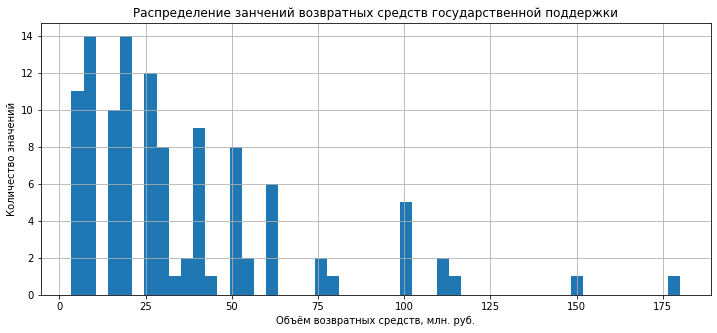

Статистика для: refundable_support
Сумма значений в столбце: 3939.00
Минимальное значение: 3.50
Максимальное значение: 180.00
Медиана: 25.00
Среднее значение: 35.49


In [66]:
data['refundable_support'].hist(bins=50, figsize=(12, 5))
plt.title('Распределение занчений возвратных средств государственной поддержки')
plt.xlabel('Объём возвратных средств, млн. руб.')
plt.ylabel('Количество значений')
plt.show()

show_info(data, 'refundable_support')

**Столбец nonrefundable_support**

In [67]:
data['nonrefundable_support'].describe()

count   332.0
mean     49.0
std      60.0
min       0.0
25%      25.0
50%      30.0
75%      40.4
max     400.0
Name: nonrefundable_support, dtype: float64

Посчитаем количество нулевых зевчеий и их количество от общего числа знвчений в столбце

In [68]:
zero_count(data, 'nonrefundable_support')

Количество нулевых значений: 9
Доля нулевых значений: 0.12%


Заменим нулевые значения в столбце на пропуски

In [69]:
data['nonrefundable_support'].replace(0.00, pd.NA, inplace=True)

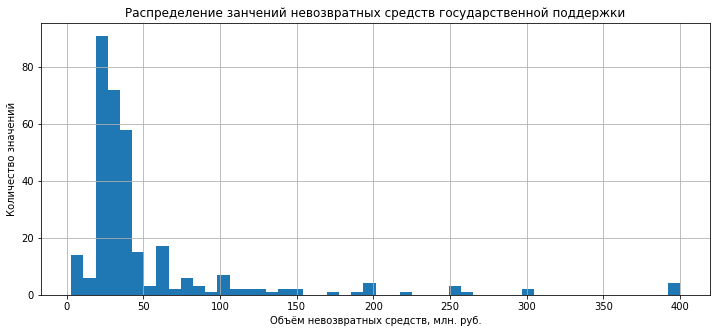

Статистика для: nonrefundable_support
Сумма значений в столбце: 16261.69
Минимальное значение: 3.00
Максимальное значение: 400.00
Медиана: 30.00
Среднее значение: 50.35


In [70]:
data['nonrefundable_support'].hist(bins=50, figsize=(12, 5))
plt.title('Распределение занчений невозвратных средств государственной поддержки')
plt.xlabel('Объём невозвратных средств, млн. руб.')
plt.ylabel('Количество значений')
plt.show()

show_info(data, 'nonrefundable_support')

**Столбец budget**

In [71]:
data['budget'].describe()

count     332.0
mean      131.4
std       187.1
min         6.0
25%        45.5
50%        71.2
75%       150.0
max     2,305.1
Name: budget, dtype: float64

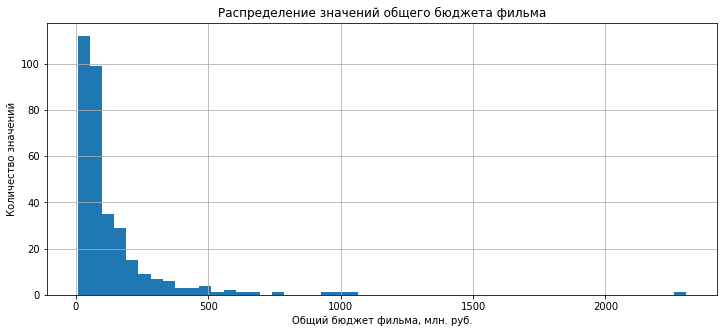

Статистика для: budget
Сумма значений в столбце: 43632.24
Минимальное значение: 6.00
Максимальное значение: 2305.07
Медиана: 71.20
Среднее значение: 131.42


In [72]:
data['budget'].hist(bins=50, figsize=(12, 5))
plt.title('Распределение значений общего бюджета фильма')
plt.xlabel('Общий бюджет фильма, млн. руб.')
plt.ylabel('Количество значений')
plt.show()

show_info(data, 'budget')

**Столбец box_office**

In [73]:
data['box_office'].describe()

count   3,158.0
mean       76.5
std       240.4
min         0.0
25%         0.1
50%         2.3
75%        24.0
max     3,073.6
Name: box_office, dtype: float64

Посчитаем количество нулевых зевчеий и их количество от общего числа знвчений в столбце

In [74]:
zero_count(data, 'box_office')

Количество нулевых значений: 24
Доля нулевых значений: 0.32%


Заменим нулевые значения в столбце на пропуски

In [75]:
data['box_office'].replace(0.00, pd.NA, inplace=True)

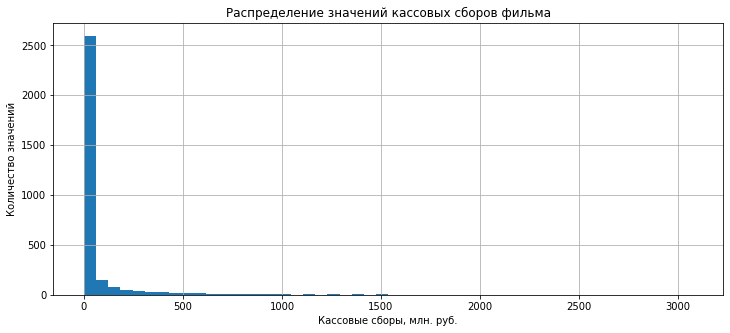

Статистика для: box_office
Сумма значений в столбце: 241519.72
Минимальное значение: 0.00
Максимальное значение: 3073.57
Медиана: 2.41
Среднее значение: 77.06


In [76]:
data['box_office'].hist(bins=50, figsize=(12, 5))
plt.title('Распределение значений кассовых сборов фильма')
plt.xlabel('Кассовые сборы, млн. руб.')
plt.ylabel('Количество значений')
plt.show()

show_info(data, 'box_office')

**Вывод**

- Во всех количественных столбцах заменили нулевые значения пропусками.
- Так как бюджет фильма уже включает в себя полный объём государственной поддержки, мы заменили те строки где сумма государственной поддержки превышает бюджет фильма.

Основная особенность, связанная с анализом количественных значений связана с тем, что размеры поддержки, бюджета фильма, кассовых сборов, и прочих финансовых показателей могут отличаться в сотни, тысячи, и даже в десятки тысяч раз в зависимости от рассматриваемого фильма. Более того каждая страна располагает раными финансовыми возможностями финансирования фильмов своей киноиндустрии. Также в нашей выборке присутствют фильмы за достаточно длительный промежутов времени и даже если рассматривать срез фильмов в пределах одной страны мы долдны понимать, что ценность денег 30 лет назад и сейчас кардинально различается из-за инфляции. Поэтому анализ любых средних финансовых показателей имеет смысл только в "узком окне", например, в пределах одного года и одной страны.

#### Шаг 2.6. Добавьте новые столбцы





**Добавим столбцы со следующей информацией:**

- Год проката
- Главный режиссер
- Основной жанр фильма
- Доля государственной поддержки

- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [77]:
data.insert(3, 'year', data['show_start_date'].dt.year)
data.head(2)

,title,pu_number,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,2015,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,2016,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [78]:
data.insert(7, 'head_director', data['director'].str.split(',').str[0])
data.head(2)

,title,pu_number,show_start_date,year,type,film_studio,production_country,head_director,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,2015,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,2016,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN


In [79]:
data.insert(16, 'main_genre', data['genres'].str.split(',').str[0])
data.head(2)

,title,pu_number,show_start_date,year,type,film_studio,production_country,head_director,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,main_genre,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,2015,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,боевик,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,2016,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,драма,"драма,военный",NaN


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [80]:
data['budget_share'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget'].round(2)
data.loc[data['budget_share'].isna() == False].head(3)

,title,pu_number,show_start_date,year,type,film_studio,production_country,head_director,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,main_genre,genres,box_office,budget_share
1869,А зори здесь тихие,111002915,2015-03-16 12:00:00,2015,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,Р.Давлетьяров,Unknown,«12+» - для детей старше 12 лет,50.0,100.0,220.6,Фонд кино,8.5,драма,"драма,военный,история",249.2,0.7
1986,Елки Лохматые,111023114,2014-12-10 12:00:00,2014,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",«6+» - для детей старше 6 лет,26.0,30.0,80.0,Фонд кино,5.0,семейный,"семейный,комедия",121.2,0.7
2004,Снежная Королева 2: Перезаморозка,114000214,2014-11-13 12:00:00,2014,Анимационный,"ООО ""ВИЗАРТ ФИЛЬМ""",Россия,А.Цицилин,А.Цицилин,"Ооо ""Визарт Фильм"", Ооо ""Таббак""",«0+» - для любой зрительской аудитории,30.0,40.0,252.5,Фонд кино,6.5,мультфильм,"мультфильм,фэнтези,приключения",313.5,0.3


На этапе предобработки данных было выполненно:

Привели именование столбцов к общей стилистике
Изменили типы данных в столбцах на корректные:
Преобразовали show_start_date в datetime и оставили только дату
Преобразовали процентную шкалу в ratings в десятибальную и перевили в тип float Рейтинг был получен из разных источников со своей системой оценки. Необходимо было привести к общему формату.
Изучили пропуски:
Проверили количество пропусков в каждом столбце
Заполнили там, где это было необходимо Пропуски могли возникнуть во время загрузки или выгрузки данных.
Обработали неявные дубликаты:
В pu_number было выявленно 2 дубликата и удалены.
Изучили категориальные значения и привели их единому формату:
в категориальных данных были удалены лишние пробелы в начале строки и удалены лишние спецсимволы
Изучили количественные значения:
Разделили количественные значения на 1000000 для удобства.
заменили нулевые значения в общем бюджете фильма
Добавили новые столбцы:
год выхода в прокат
главный режисер
главный продюссер
доля гос. бюджета от общего
главная страна производства

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [81]:
#Посчитаем долю фильмов с указанной информацией о прокате в кинотеатрах
round(1 - data['box_office'].isna().mean(), 2)

0.42

Теперь по каждому году посчитаем количество фильмов с указанной информацией о прокате в кинотеатрах, и без нее

In [82]:
year_counts = {}
years = sorted(data['year'].unique())

for year in years:
    total = len(data[data['year'] == year])
    with_box_office = len(data[(data['year'] == year) & (data['box_office'].isna() == False)])
    year_counts[year] = with_box_office
    print(f"{year}: всего — {total}, с прокатом — {with_box_office}")

2010: всего — 981, с прокатом — 101
2011: всего — 622, с прокатом — 109
2012: всего — 593, с прокатом — 123
2013: всего — 630, с прокатом — 179
2014: всего — 806, с прокатом — 273
2015: всего — 705, с прокатом — 462
2016: всего — 818, с прокатом — 525
2017: всего — 505, с прокатом — 357
2018: всего — 891, с прокатом — 475
2019: всего — 930, с прокатом — 530


Отобразим полученные данные на гистограмме

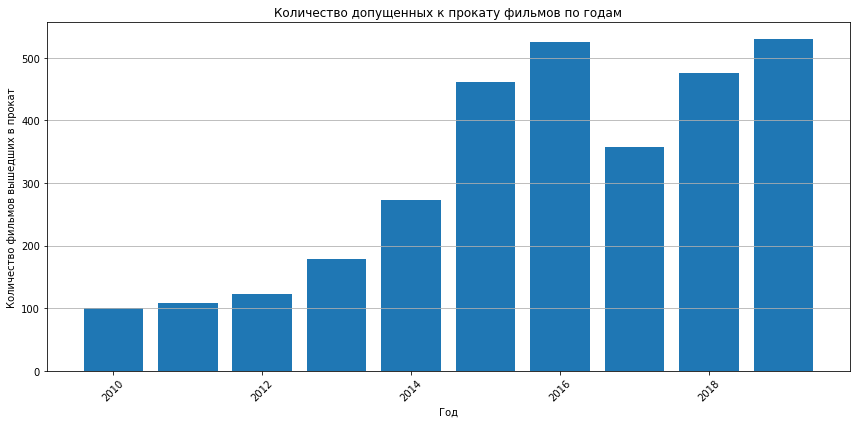

In [83]:
plt.figure(figsize=(12, 6))
plt.bar(year_counts.keys(), year_counts.values())

plt.title('Количество допущенных к прокату фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов вышедших в прокат')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- Доля фильмов, для которых есть информация о сборах: 42%
- С 2010 года заметен рост вышедших фильмов в прокат.
- В 2017 году был резкий спад, но с 2018 г. значения вернулись в норму 2015 г.
- Начиная с 2015 и до 2019 года доля фильмов, о которых известны результаты проката резко растет.

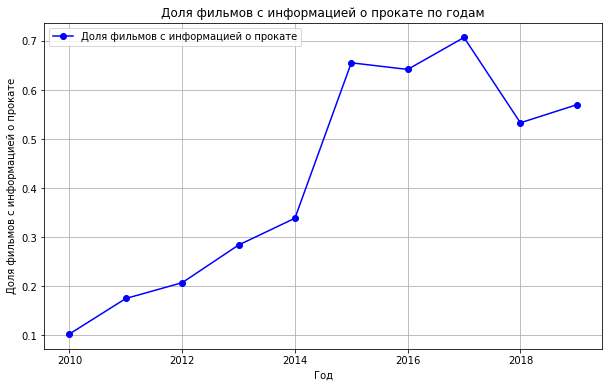

Доля фильмов с информацией о прокате по годам:
year
2010   0.1
2011   0.2
2012   0.2
2013   0.3
2014   0.3
2015   0.7
2016   0.6
2017   0.7
2018   0.5
2019   0.6
dtype: float64


In [84]:
# Считаем количество фильмов по годам
films_by_year = data.groupby('year').size()

# Считаем количество фильмов с информацией о прокате
films_with_box_office = data[data['box_office'].notna()].groupby('year').size()

# Рассчитываем долю фильмов с информацией о прокате по годам
share_with_box_office = films_with_box_office / films_by_year

# Визуализируем данные
plt.figure(figsize=(10, 6))
plt.plot(share_with_box_office.index, share_with_box_office.values, marker='o', color='b', label='Доля фильмов с информацией о прокате')
plt.title('Доля фильмов с информацией о прокате по годам')
plt.xlabel('Год')
plt.ylabel('Доля фильмов с информацией о прокате')
plt.grid(True)
plt.legend()
plt.show()

# Выводим статистику по годам
print(f"Доля фильмов с информацией о прокате по годам:")
print(share_with_box_office)

Видно, что доля фильмов с информацией о прокате растет. Период времени с 2015 года по 2019 может указывать о более полном представлении данных. В 2018 году заметно падение доли в сравнении с 2017 годом. Это может быть связано с выходом большого количества картин, которые не выходили в кинотеатре.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [85]:
data['box_office'] = pd.to_numeric(data['box_office'], errors='coerce')
project_dinamic_by_year = data.pivot_table(index='year', values='box_office', aggfunc=['count', 'sum'])

project_dinamic_by_year.columns = ['film_count', 'total_box_office']

print(project_dinamic_by_year)

      film_count  total_box_office
year                              
2010         101               2.4
2011         109              14.1
2012         123               7.0
2013         179              29.8
2014         273           7,445.0
2015         462          39,497.4
2016         525          47,866.3
2017         357          48,563.7
2018         475          49,668.4
2019         530          48,425.7


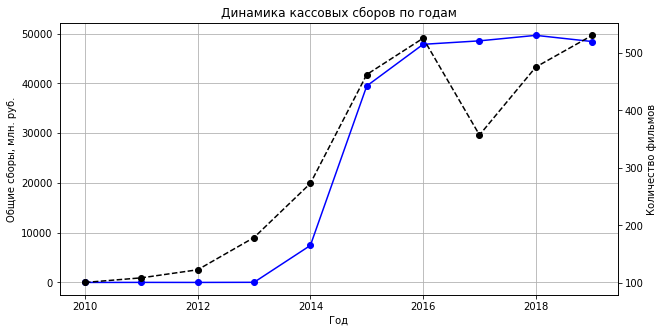

In [86]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(project_dinamic_by_year['total_box_office'], linestyle='-', marker='o', color='blue')
ax1.set_xlabel('Год')
ax1.set_ylabel('Общие сборы, млн. руб.')
ax1.grid()

ax2 = ax1.twinx()

ax2.plot(project_dinamic_by_year['film_count'], linestyle='--', marker='o', color='black')
ax2.set_ylabel('Количество фильмов')

plt.title('Динамика кассовых сборов по годам')
plt.show()

**Вывод**

- Минимальная общая сумма сборов была в 2015 году и составила около 39.5 млрд. руб. (при 457 фильмах, вышедших в прокат).
- Максимальная общая сумма сборов случилась в 2018 году и составила около 49.6 млрд. руб. (при 474 фильмах, вышедших в прокат).
- Меньше всего фильмов вышло в 2017 году (357 шт.), больше всего - в 2019 году (530 шт.)

Учитывая то, что в 2017 году вышло меньше всего фильмов (более чем на 100 фильмов меньше, чем в соседних 2016 и 2018 годах, 2017 год не демонстрирует "провал" по сборам, более того сборы в этом году вполне сравнимы со сборами в 2018 году, и даже превышают сборы 2016 года, когда вышло на 159 фильмов больше.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [87]:
box_office_year_avg = data[~(data['box_office'].isna())].pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
box_office_year_avg.columns = ['income_mean', 'income_median']
box_office_year_avg

,income_mean,income_median
year,,
2010,0.0,0.0
2011,0.1,0.0
2012,0.1,0.0
2013,0.2,0.0
2014,27.3,0.0
2015,85.5,5.0
2016,91.2,3.9
2017,136.0,10.0
2018,104.6,8.9


Text(0, 0.5, 'Средняя сумма кассовых сборов, млн. руб.')

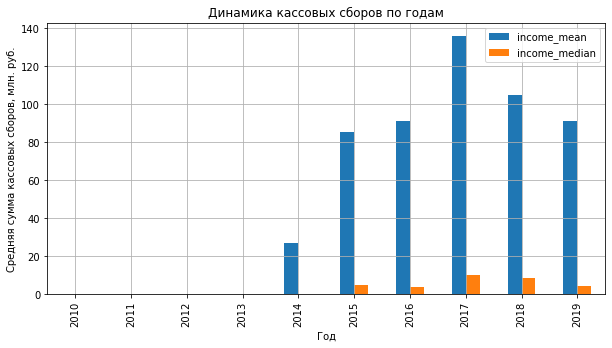

In [88]:
box_office_year_avg.plot(
    kind='bar',
    figsize=(10, 5)
)
plt.grid(True)
plt.title('Динамика кассовых сборов по годам')
plt.xlabel('Год')
plt.ylabel('Средняя сумма кассовых сборов, млн. руб.')

**Вывод**

- Средние медианные и средние арифметические значения сборов по каждому году сильно различаются.
- Так, например, в 2017 году медианное среднее сборов составило около 10 млн. руб., а среднее арифметическое - 136 млн.руб.

На гистограмме распределения значений столбца 'box_office' мы видели, что количество фильмов с небольшими сборами многократно превышает количество фильмов, которым удалось получить большие кассовые сборы. При этом есть фильмы, сборы которых могут в тысячи раз превышать сборы другого фильма. Например, в 2017 году четверть всех фильмов в прокате собрали менее 2.5 илн. руб. Вместе с этим сборы самого кассового фильма этого года составили более 2.27 млрд. руб., что в сотни (а то и в тысячи) раз превышает сборы большинства фильмов этого года.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [89]:
audience_age_category = (data.query("year >= 2015 and box_office > 0")).pivot_table(
    index='year', 
    columns='age_restriction',
    values='box_office',
    aggfunc='sum'
)

audience_age_category

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2015,379.1,"13,616.1","11,368.1","5,432.3","8,701.8"
2016,150.2,"12,204.4","16,664.5","6,793.9","12,053.1"
2017,229.6,"7,851.4","18,745.0","9,651.5","12,086.1"
2018,32.4,"14,267.3","16,503.6","8,760.1","10,105.0"
2019,17.7,"12,680.2","12,753.4","10,121.8","12,852.5"


Отобразим полученные данные на графике

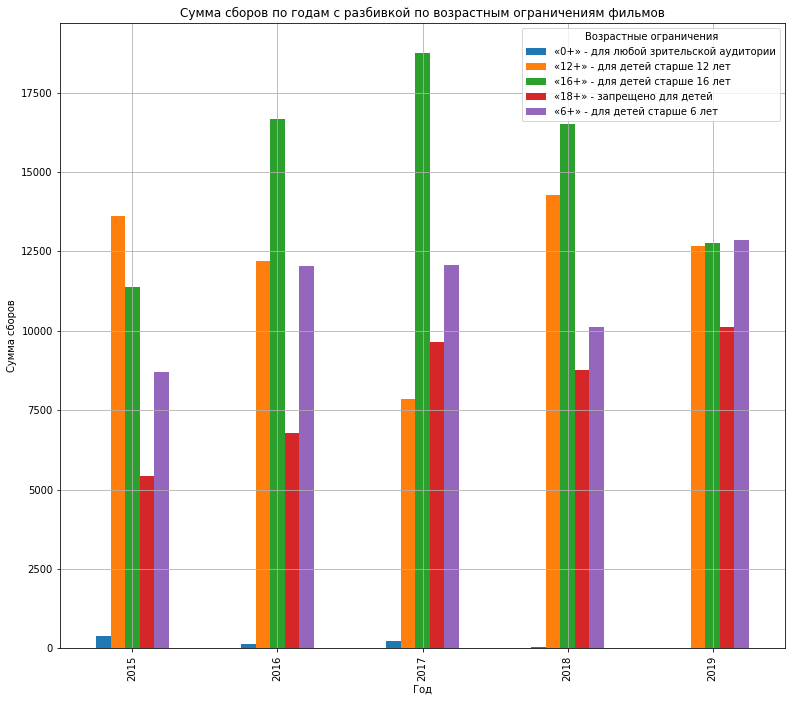

In [90]:
audience_age_category.plot(
    kind='bar',
    figsize=(13, 11.5)
)

plt.grid(True)
plt.title("Сумма сборов по годам с разбивкой по возрастным ограничениям фильмов")
plt.xlabel("Год")
plt.ylabel("Сумма сборов")
plt.legend(title='Возрастные ограничения')

с 2010 по 2014 г суммы сборов фильмов для каждого возрастного огранчения были минимальными.
с 2015 по 2018 г лидировали фильмы с ограничение 16+, в остальных категориях заметен небольшой спад или значения не особо менялись.В 2018 г сбор составил 9.126963^9 (при этом это значение является максимальным за все время и во всех категориях возрастного ограничения).
Меньше всего сборов за все время собрала категория 0+.

Вывод
Исходя из поставленных задач, были сделанны следующие выводы:

Исследование количества допущенных к прокату фильмов по годам

Доля фильмов, для которых есть информация о сборах: 42.31%
С 2010 года заметен рост вышедших фильмов в прокат.
В 2017 году был резкий спад, но с 2018 г. значения вернулись в норму 2016 г. Скорее всего такой спад связан с повышеннием стоимости прокатного удостоверения до 5 млн. руб.
Начиная с 2015 и до 2019 года доля фильмов, о которых известны результаты проката резко растет.
Изучение суммы сборов по годам

Минимальная сумма сборов была в 2010 году и составила 2399095, в свою очередь максимальная сумма сборов составляет 25916633419 (в 2018 г.).
С 2014 по 2018 г сборы значительно увелечились.
Изучение средних и медианых сумм сбора по годам

Видим, что среднее и медиана сильно разняться. Это говорит нам об асимметрии, при этом, если среднее значение переменной больше медианы, ее распределение имеет положительную асимметрию. Также это говорит нам о наличие выбросах в столбце.
Исследование сумм сборов по годам с разбивкой по возрастным ограничениям фильмов

с 2010 по 2014 г суммы сборов фильмов для каждого возрастного огранчения были минимальными.
с 2015 по 2018 г лидировали фильмы с ограничение 16+, в остальных категориях заметен небольшой спад или значения не особо менялись.В 2018 г сбор составил 9.126963^9 (при этом это значение является максимальным за все время и во всех категориях возрастного ограничения).
Меньше всего сборов за все время собрала категория 0+.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [91]:
print(f'Общее количество фильмов: {data["title"].count()}')
rus_films = (data.query("production_country == 'Россия'"))
print(f'Количество фильмов выпущенных Россией: {len(rus_films)}')
rus_with_support = (data[(data['production_country']  == 'Россия') & (data['financing_source'].notna())])
print(f'Количество фильмов выпущенных Россией и получивших гос.поддержку: {len(rus_with_support)}')

Общее количество фильмов: 7481
Количество фильмов выпущенных Россией: 1822
Количество фильмов выпущенных Россией и получивших гос.поддержку: 316


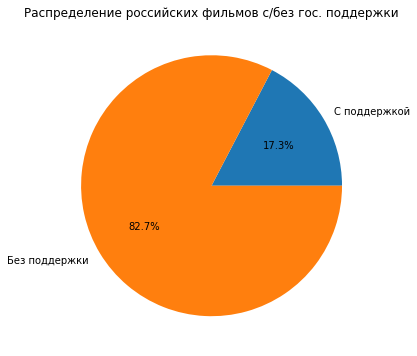

In [92]:
rus_without_support = len(rus_films) - len(rus_with_support)

# Подготовка данных для pie chart
labels = ['С поддержкой', 'Без поддержки']
sizes = [len(rus_with_support), rus_without_support]

# Рисуем pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Распределение российских фильмов с/без гос. поддержки')
plt.show()

Среди всех фильмов выпущенных Россией, только 17.3% получили господдержку.

**Динамика финансирования по годам**

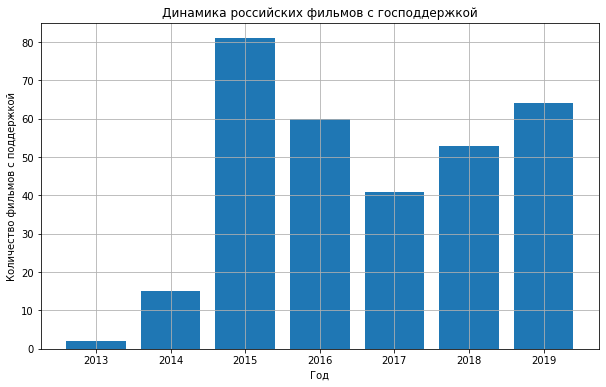

In [93]:
count_by_year = rus_with_support.groupby('year').size()

count_by_year.index
count_by_year.values

plt.figure(figsize=(10, 6))
plt.bar(count_by_year.index, count_by_year.values)
plt.title('Динамика российских фильмов с господдержкой')
plt.xlabel('Год')
plt.ylabel('Количество фильмов с поддержкой')
plt.grid(True)

Данные о государственной поддержке имеются с 2013 года. На графике видно, что больше всего средств было выделено в 2015 году. Затем в 2017 году можем наблюдать заметный спад, но начиная с 2018 года, мы снова можем наблюдать рост фильмов с государственной поддержкой

Проверим, наблюдается ли похожая динамика в отношении объема выделенных средств.

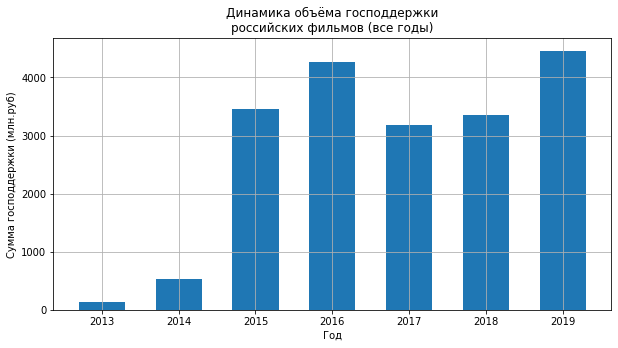

In [94]:
budget_sup_rus_film = rus_with_support.copy()

# Рассчитываем total_support = refundable_support + nonrefundable_support:
budget_sup_rus_film['refundable_support'] = budget_sup_rus_film['refundable_support'].fillna(0)
budget_sup_rus_film['nonrefundable_support'] = budget_sup_rus_film['nonrefundable_support'].fillna(0)
budget_sup_rus_film['total_support'] = (
    budget_sup_rus_film['refundable_support'] +
    budget_sup_rus_film['nonrefundable_support']
)

# Группируем по year (все года, которые есть в данных) и суммируем total_support:
sum_support_by_year = (
    budget_sup_rus_film
    .groupby('year')['total_support']
    .sum()
    .sort_index() # чтобы годы шли по возрастанию
)

# Строим bar chart для всех годов:
plt.figure(figsize=(10, 5))
plt.bar(sum_support_by_year.index, sum_support_by_year.values, width=0.6)
plt.xlabel('Год')
plt.ylabel('Сумма господдержки (млн.руб)')
plt.title('Динамика объёма господдержки\nроссийских фильмов (все годы)')
plt.grid(True)
plt.show()

**Рейтинг фильмов с господдержкой**

Средний рейтинг фильмов с господдержкой: 6.0
Медианный рейтин фильмов с господдержкой: 6.2


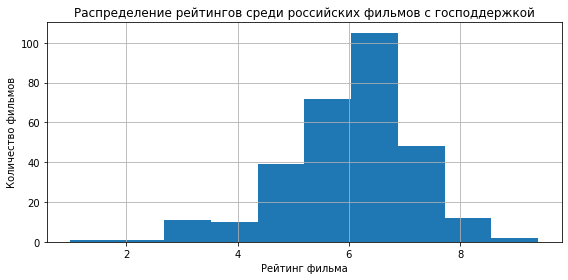

In [95]:
#Формируем булеву маску (Series типа True/False)
mask = (rus_with_support['ratings'].notna()) & (rus_with_support['ratings'] != 0)

#Отбираем значения рейтингов по этой маске
ratings = rus_with_support.loc[mask, 'ratings']

print(f'Средний рейтинг фильмов с господдержкой: {ratings.mean():.2}')
print(f'Медианный рейтин фильмов с господдержкой: {ratings.median():.2}')

#Строим гистограмму
plt.figure(figsize=(8, 4))
plt.hist(ratings, bins=10)
plt.xlabel('Рейтинг фильма')
plt.ylabel('Количество фильмов')
plt.title('Распределение рейтингов среди российских фильмов с господдержкой')
plt.grid(True)
plt.tight_layout()
plt.show()

**Распределение по жанрам фильмов с господдержкой**

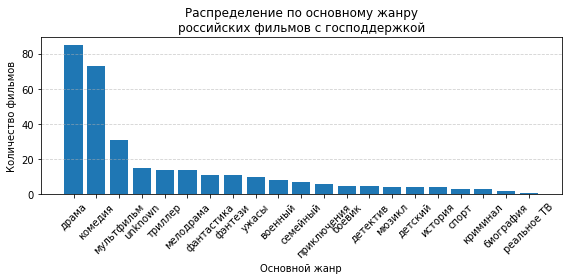

In [96]:
genre_counts = rus_with_support['main_genre'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Основной жанр')
plt.ylabel('Количество фильмов')
plt.title('Распределение по основному жанру\nроссийских фильмов с господдержкой')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**ТОП-10**

Закончим исследование различными рейтингами. Построим рейтинги ТОП-10 фильмов на основе:

- Рейтинга фильма
- Общего бюджета фильма
- Объема кассовых сборов
- Выделенного объема средств государственной поддержки

Перед этим построим сводную таблицу во всеми необходимыми данными.

In [97]:
#Отбираем только те фильмы, у которых рейтинг задан и не равен 0
mask = rus_with_support['ratings'].notna() & (rus_with_support['ratings'] != 0)

#Сортируем по рейтингу по убыванию и берём первые 10
top10_by_rating = rus_with_support.loc[mask].sort_values('ratings', ascending=False).head(10)

#Выводим нужные столбцы, например title и ratings
print(top10_by_rating[['title', 'year', 'ratings']].reset_index(drop=True))


                     title  year  ratings
0                  Главный  2015      9.4
1            Я умею вязать  2015      9.0
2       А зори здесь тихие  2015      8.5
3                  БОЛЬШОЙ  2016      8.5
4                 Миллиард  2019      8.2
5            Пока еще жива  2013      8.1
6                  Мотылёк  2017      8.0
7  Байкал - Сердце мира 3D  2019      8.0
8                  Однажды  2015      7.9
9                    Герой  2019      7.9


**Топ-10 по бюджету**

In [98]:
# Отбираем российские фильмы с поддержкой и валидным бюджетом
films_budget = rus_with_support[
    rus_with_support['budget'].notna() &
    (rus_with_support['budget'] > 0)
].copy()

# Сортируем по убыванию бюджета и берём первые 10
top10_by_budget = films_budget.sort_values('budget', ascending=False).head(10)

# Выводим таблицу с нужными столбцами
print("Топ-10 российских фильмов с господдержкой по бюджету:")
print(top10_by_budget[['title', 'year', 'budget']].reset_index(drop=True))


Топ-10 российских фильмов с господдержкой по бюджету:
                 title  year  budget
0             Матильда  2017 1,032.9
1        Союз спасения  2019   980.0
2            Вторжение  2019   944.0
3              Дуэлянт  2016   684.2
4              Экипаж   2016   635.3
5       Движение вверх  2017   590.2
6                 Т-34  2018   563.8
7  Время первых (2017)  2017   528.4
8  Легенда о Коловрате  2017   500.0
9           Территория  2015   500.0


**Топ-10 по кассовым сборам**

In [99]:
# Отбираем российские фильмы с поддержкой и валидными сборами
films_box = rus_with_support[
    rus_with_support['box_office'].notna()
].copy()

# Сортируем по убыванию сборов и берём первые 10
top10_by_box = films_box.sort_values('box_office', ascending=False).head(10)

# Выводим таблицу с нужными столбцами
print("Топ-10 российских фильмов с господдержкой по кассовым сборам:")
print(top10_by_box[['title', 'year', 'box_office']].reset_index(drop=True))


Топ-10 российских фильмов с господдержкой по кассовым сборам:
                             title  year  box_office
0                            Холоп  2019     3,073.6
1                   Движение вверх  2017     2,779.7
2                             Т-34  2018     2,271.8
3               Последний богатырь  2017     1,655.0
4                              Лёд  2018     1,445.7
5                          Экипаж   2016     1,402.3
6                Притяжение (2016)  2016     1,038.3
7                       Ёлки Новые  2017       855.5
8                           Тренер  2018       820.5
9  Три богатыря и принцесса Египта  2017       759.2


**Топ-10 по объёму господдержки**

In [100]:
# Сначала рассчитываем total_support = refundable_support + nonrefundable_support
films_support = rus_with_support.copy()
films_support['refundable_support'] = films_support['refundable_support'].fillna(0)
films_support['nonrefundable_support'] = films_support['nonrefundable_support'].fillna(0)
films_support['total_support'] = (
    films_support['refundable_support'] +
    films_support['nonrefundable_support']
)

# Сортируем по убыванию total_support и берём первые 10
top10_by_support = films_support.sort_values('total_support', ascending=False).head(10)

# Выводим таблицу с нужными столбцами
print("Топ-10 российских фильмов с господдержкой по объёму поддержки:")
print(top10_by_support[['title', 'year', 'total_support']].reset_index(drop=True))


Топ-10 российских фильмов с господдержкой по объёму поддержки:
                 title  year  total_support
0        Союз спасения  2019          500.0
1            Вторжение  2019          500.0
2              Дуэлянт  2016          450.0
3              Экипаж   2016          442.1
4       Движение вверх  2017          400.0
5  Легенда о Коловрате  2017          350.0
6             Матильда  2017          300.0
7              Девятая  2019          300.0
8              Ледокол  2016          300.0
9               Тренер  2018          260.0


**Выводы**

- Примерно 17% фильмов, выходящих в Российском прокате получают поддержку от государственных фондов.

- Министерство культуры и Фонд кино спонтируют примерно равное количество фильмов, при этом Фондом кино выделяется большее количество средств (примерно 75% процентов к 25% средств, выделяемых Министерством культуры).

- С 2015 по 2017 год количество фильмов, спонсируемых государством уменьшалось в 2 раза (примерно в 80 до 40), после чего с 2017 по 2019 год снова начало расти (с 40 до 60). В отношении выделенных бюджетных средств данная динамика повторяется во втором периоде (с 2017 по 2019 год), чего не наблюдается в первом периоде. В 2016 году при меньшем количестве фильмов (60 шт. при 84 шт. в 2015 году) было выделено большее количество бюджетных средств на их поддержку (4.25 млрд. руб. в сравнении с 3.5 млрд. руб. в 2015 году).

- Примерно каждый 5 фильм окупает выделенные на него средства. Самый успешный в этом плане год - 2017. В этом году 15 из 39 фильмов окупили выделенные на их съемку средства. Самый худший - 2019. В этом году только 11 фильмов из 60 окупили выделенные средства.

- При этом в среднем объем кассовых сборов во все годы превышает объем выделенных государством средств.

- Чаще всего государство спонсирует фильмы в категории "16+" и "12+", реже всего - в категории "0+".

- Самый популярный жанр фильмов - драма. На 80 фильмов в этом жанре было выделено в общей сложности около 5 млрд. руб.

- В среднем, фильмы поддерживаемые финансово государством показывают невысокий средний рейтинг (6.0). Средний рейнинг фильмов по всей предоставленной нам выборке равен 6.6. При этом ни в одином из рассматриваемых нами периодов средний рейтинг фильмов за год не превышал этого значения.

- Фильм с самым большим значением выделенных государством бюджетных средств на его поддержку - "Союз спасения" (А.Кравчук, 2019). На его поддержку было выделено 500 млн. руб. При этом рейтинг этого фильма составил те самые "средние" 6.00.

- Самый высокобюджетный фильм - "Тайна Печати Дракона" (О.Степченко, 2019). Его общий бюджет составил 2.3 млрд.руб., при государственной поддержке в 270 млн.руб. и кассовых сборах 333 млн.руб.

- Фильм с самым большим размером кассовых сборов - "Холоп" (К.Шипенко, 2019). За время проката он собрал более 3 млрд. руб. При этом рейтинг фильма нельзя назвать высоким - 6.80.

- Самым высокорейтинговым фильмом в данной подборке стал "Главный" (Ю.Кара, 2015). Пользовательский рейтинг этого фильма составил рекордные 9.4). Возможно фильм еще не набрал достаточное количество оценок и такое высокое значение не стоит воспринимать в серьез.

- Наконец больше всего бюджетных средств было выделено на поддержку фильмов Н. Хомерики - 660 млн. руб.

### Шаг 5. Напишите общий вывод

**ОБЩИЙ ВЫВОД**

*Общая информация:*

В данном проекте провели анализ данных, опубликованных на портале Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. Каждая строчка в таблице описывает характеристики фильма, вышедшего в российский прокат.

*На этапе предобработки данных мы:*

1. Проверили типы данных в датафрейме и преобразовали их там, где это необходимо.

- Значения в столбце show_start_date привели к типу datetime, отбросив временную часть.
- Значения в столбце ratings привели к типу float. Скорректировали ошибки, связанные с разным форматом значений оценок (десятибальные и процентные).
2. Обработали пропуски.

- Вручную заполнили несколько пропусков в столбце 'production_country.'
- Пропуски в столбцах 'director' и 'film_studio' удалили, как малозначимые.
- Пропуски в столбцах 'genres' (975 шт.) и 'producer' (568 шт.) заполнили значением 'не известен'.
- Пропуски в оставшихся столбцах оставили без изменений.
- Проверили значения на явные и неявные дубликаты и устранили их, если это возможно и целесообразно.

В данных не были выявлены явные дубликаты.
Неявные дуликаты в количестве 2 шт. были исключены из анализа.
Изучили категориальные значения и исправили выявленные ошибки.

Из всех категориальных значений были убраны лишние пробелы, точки, и прочие знаки, за счет чего удалось достичь уменьшения количества неявных дубликатов во всех столбцах.
Значения в столбцах production_country, director, и producer были приведены к стилю title, когда каждое новое слово пишелся с заглавной буквы.
Значения в столбце type были приведены к стилю capitalize, когда первое слово пишелся с заклавной буквы, а все остальные - прописью.
Общая проблема категориальных значений связана с тем, что в одном столбце может быть указано сразу несколько категорий, например, один и тот же фильм может относится одновременно к категории "драма" и "комедия", или в съемках фильма могло одномременно учавствовать сразу несколько стран, т.д. Получается слишком большое разнообразие для сортировки данных по категориям.

Проверили количественные значения и обработали странные данные.

Во всех количественных столбцах заменили нулевые значения пропусками.
Т.к. бюджет фильма не может быть нулевым (или отсутствовать) при ненулевых значениях поддержки со стороны государства, мы заменили значения бюджета на общую сумму поддержки.
Основная особенность, связанная с анализом количественных значений связана с тем, что размеры поддержки, бюджета фильма, кассовых сборов, и прочих финансовых показателей могут отличаться в сотни, тысячи, и даже в десятки тысяч раз в зависимости от рассматриваемого фильма. Более того каждая страна располагает раными финансовыми возможностями финансирования фильмов своей киноиндустрии. Также в нашей выборке присутствют фильмы за достаточно длительный промежутов времени и даже если рассматривать срез фильмов в пределах одной страны мы долдны понимать, что ценность денег 30 лет назад и сейчас кардинально различается из-за инфляции. Поэтому анализ любых средних финансовых показателей имеет смысл только в "узком окне", например, в пределах одного года и одной страны.

Добавили столбцы со следующей информацией:

- Год проката
- Главный режиссер
- Основной жанр фильма
- Основная страна производства
- Доля государственной поддержки

*После этого мы присутпили к исследовательскому анализу данных. На данном этапе нам предстояло ответить на следующие вопросы и решить следующие задачи:*

Cколько фильмов выходило в прокат каждый год. Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.
Изучить, как менялась динамика проката по годам. В каком году сумма сборов была минимальной/максимальной?
С помощью сводной таблицы посчитать среднюю и медианную сумму сборов для каждого года.
Определить, влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате?
Мы пришли к следующим выводам:

В период с 2010 по 2014 год доля фильмов с информацией о прокате в кинотеатрах постепенно увеличивается. С 2015 года количество информации резко увеличивается с 28 до 65% и после этого значения колеблятся в пределах +-10%. Подобное поведение данных на графике вероятно связано с цифровизацией и автоматизацией сбора информации. Период с 2015 по 2019 годы представлен наиболее полно всего объема данных.

Минимальная общая сумма сборов была в 2015 году и составила около 39.5 млрд. руб. (при 457 фильмах, вышедших в прокат). Максимальная общая сумма сборов случилась в 2018 году и составила около 49.6 млрд. руб. (при 474 фильмах, вышедших в прокат). Меньше всего фильмов вышло в 2017 году (357 шт.), больше всего - в 2019 году (530 шт.). Учитывая то, что в 2017 году вышло меньше всего фильмов (более чем на 100 фильмов меньше, чем в соседних 2016 и 2018 годах, 2017 год не демонстрирует "провал" по сборам, более того сборы в этом году вполне сравнимы со сборами в 2018 году, и даже превышают сборы 2016 года, когда вышло на 159 фильмов больше.

Средние медианные и средние арифметические значения сборов по каждому году сильно различаются. Так, например, в 2017 году медианное среднее сборов составило около 10 млн. руб., а среднее арифметическое - 136 млн.руб. На гистограмме распределения значений столбца 'box_office' мы видели, что количество фильмов с небольшими сборами многократно превышает количество фильмов, которым удалось получить большие кассовые сборы. При этом есть фильмы, сборы которых могут в тысячи раз превышать сборы другого фильма. Например, в 2017 году четверть всех фильмов в прокате собрали менее 2.5 илн. руб. Вместе с этим сборы самого кассового фильма этого года составили более 2.27 млрд. руб., что в сотни (а то и в тысячи) раз превышает сборы большинства фильмов этого года.

В целом, графики для всех возрастных категорий (за исключением категории "12+" имеют сходую динамику - сборы увеличиваютя с 2015 по 2017 год, и уменьшаются с 2017 по 2019 год. При этом наибольшая общая сумма сборов принадлежит категории "16+", а наименьшая - категории "0+". Здесь ничего удивительного - бизнес будет работать на максимально на свою целевую аудиторию. Реже всего кинотеатры посещают родители с младенцами, по вполне очевидным причинам. Больше всего возможностей и свободного времени - у подростковой аудитории в возрасте 16+. Для них снимается большее количество фильмов, как следствие, для этой категории получаются большие кассовые сборы.

*Дополнительно перед нами стояла задача изучить фильмы, которые получили государственную поддержку.*

Проведенный анализ показал следующее:

- Примерно 16% фильмов, выходящих в Российском прокате получают поддержку от государственных фондов.

- Министерство культуры и Фонд кино спонтируют примерно равное количество фильмов, при этом Фондом кино выделяется большее количество средств (примерно 75% процентов к 25% средств, выделяемых Министерством культуры).

- С 2015 по 2017 год количество фильмов, спонсируемых государством уменьшалось в 2 раза (примерно в 80 до 40), после чего с 2017 по 2019 год снова начало расти (с 40 до 60). В отношении выделенных бюджетных средств данная динамика повторяется во втором периоде (с 2017 по 2019 год), чего не наблюдается в первом периоде. В 2016 году при меньшем количестве фильмов (60 шт. при 84 шт. в 2015 году) было выделено большее количество бюджетных средств на их поддержку (4.25 млрд. руб. в сравнении с 3.5 млрд. руб. в 2015 году).

- Примерно каждый 5 фильм окупает выделенные на него средства. Самый успешный в этом плане год - 2017. В этом году 15 из 39 фильмов окупили выделенные на их съемку средства. Самый худший - 2019. В этом году только 11 фильмов из 60 окупили выделенные средства.

- При этом в среднем объем кассовых сборов во все годы превышает объем выделенных государством средств.

- Чаще всего государство спонсирует фильмы в категории "16+" и "12+", реже всего - в категории "0+".

- Самый популярный жанр фильмов - драма. На 80 фильмов в этом жанре было выделено в общей сложности около 5 млрд. руб.

- В среднем, фильмы поддерживаемые финансово государством показывают невысокий средний рейтинг (6.0). Средний рейнинг фильмов по всей предоставленной нам выборке равен 6.6. При этом ни в одином из рассматриваемых нами периодов средний рейтинг фильмов за год не превышал этого значения.

- Фильм с самым большим значением выделенных государством бюджетных средств на его поддержку - "Союз спасения" (А.Кравчук, 2019). На его поддержку было выделено 500 млн. руб. При этом рейтинг этого фильма составил те самые "средние" 6.00.

- Самый высокобюджетный фильм - "Тайна Печати Дракона" (О.Степченко, 2019). Его общий бюджет составил 2.3 млрд.руб., при государственной поддержке в 270 млн.руб. и кассовых сборах 333 млн.руб.

- Фильм с самым большим размером кассовых сборов - "Холоп" (К.Шипенко, 2019). За время проката он собрал более 3 млрд. руб. При этом рейтинг фильма нельзя назвать высоким - 6.80.

- Самым высокорейтинговым фильмом в данной подборке стал "Главный" (Ю.Кара, 2015). Пользовательский рейтинг этого фильма составил рекордные 9.4). Возможно фильм еще не набрал достаточное количество оценок и такое высокое значение не стоит воспринимать в серьез.

- Наконец больше всего бюджетных средств было выделено на поддержку фильмов Н. Хомерики - 660 млн. руб.